# Сборный проект № 1 "Анализ исторических данных о продажах компьютерных игр для кампании 2017 года"

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Подключим необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import seaborn as sns

## Откроем файл с данными и изучим общую информацию

In [2]:
df = pd.read_csv('/datasets/games.csv')

Ознакомимься с общей информацией о данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим первые строки датафрейма

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Проверим дубли

In [5]:
df.duplicated().sum()

0

Проверим пропуски

In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод:** Получены исторические данные о продажах компьютерных игр. В данных есть проблемы - неверные типы данных, пропуски, заглавные буквы в именах столбцов. Необходимо выполнить предобработку данных перед их анализом.

## Предобработка данных

Переименуем столбцы, приведем в нижний регистр

In [7]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исправим тип данных для столбца year_of_release и удалим пропуски в столбце year_of_release

In [8]:
df.dropna(axis=0, subset=['year_of_release'], inplace=True)
df['year_of_release'].isna().sum() 

0

In [9]:
df['year_of_release'] = df['year_of_release'].astype(int)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Удалим пропуски для столбца name, т.к. заменить какм-либо значением их нельзя

In [11]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
df.dropna(axis=0, subset=['name'], inplace=True)
df['name'].isna().sum()

0

Пропуски для столбца genre тоже удалены (при обработке пропусков в столбце name)

In [13]:
df['genre'].isna().sum()

0

Обработаем пропуски для столбца rating

In [14]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим пропуски значением 'none'

In [15]:
df['rating'] = df['rating'].fillna('none')

Обработаем пропуски в столбце user_score и исправим тип данных

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим, что встречаются значения - 'tbd' - To Be Determined, что означает, что рейтинга еще нет (ожидается). Для нашего анализа обработаем такие строки как и пропуски - заменим на "-1".

In [17]:
df['user_score'] = df['user_score'].replace('tbd', -1)
df['user_score'] = df['user_score'].fillna(-1)

In [18]:
df['user_score'] = df['user_score'].astype(float)

Обработаем пропуски для столбца critic_score и исправим тип данных

In [19]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [20]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [21]:
df['critic_score'] = df['critic_score'].astype(int)

In [22]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Добавим столбец с общим количеством проданных копий

In [24]:
df['sum_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

**Вывод:** Данные подготовлены к исследовательскому анализу, исправлены найденные проблемы - пропуски, неверные типы, имена столбцов. Добавлен столбец с общей суммой продаж.

## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [25]:
df['year_of_release'].value_counts(ascending=False)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Для наглядности построим график

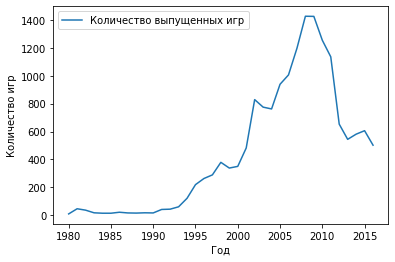

In [26]:
year_of_release_pivot_table = pd.pivot_table(df[df['year_of_release']>0], index='year_of_release', values='name', aggfunc='count')
year_of_release_pivot_table.columns = ['Количество выпущенных игр']
year_of_release_pivot_table.index.name = 'Год'
ax = year_of_release_pivot_table.plot()
ax.set_ylabel('Количество игр')  
plt.show()

**Вывод:** посмотрели распределение выпущенных игр по годам. Можно предположить, что данные ранее 1995 г не важны, т.к. индустрия не была еще так развита и потребителей было мало.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [28]:
new_df_sum = df.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum').reset_index()
new_df_sum = new_df_sum.sort_values(by='sum_sales', ascending=False)
new_df_sum.head(10)

,platform,sum_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


6 платформ с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS. Создадим новые датафреймы для них и построим график распределения.

In [29]:
df[df['platform'] == 'PS2'].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,8.5,E,11.65


Добавим функцию для построения графиков

In [30]:
def func_barh(platform):
    data = pd.pivot_table(df[df['platform']==platform], index='year_of_release', values='sum_sales', aggfunc='count')
    plt.figure(figsize=(6,3))
    ax = sns.barplot(x = data.index, y = 'sum_sales', data = data)
    ax.set(xlabel = 'Год', ylabel = 'Кол-во продаж', title = 'Распределение продаж игр на платформе {} по годам'.format(platform))
    plt.xticks(rotation = 45)

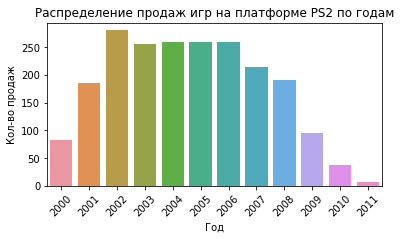

In [31]:
func_barh('PS2')
plt.show()

In [32]:
df[df['platform'] == 'X360'].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87,6.3,M,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68


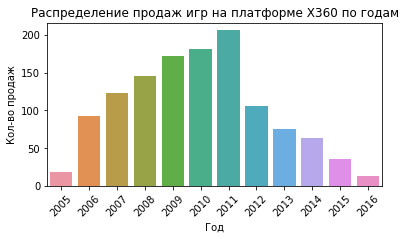

In [33]:
func_barh('X360')
plt.show()

In [34]:
df[df['platform'] == 'PS3'].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84,7.5,E,10.70


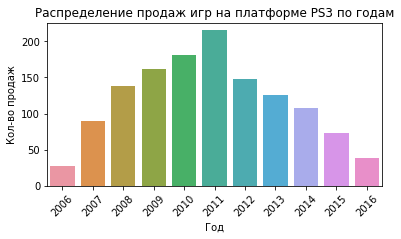

In [35]:
func_barh('PS3')
plt.show()

In [36]:
df[df['platform'] == 'Wii'].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32


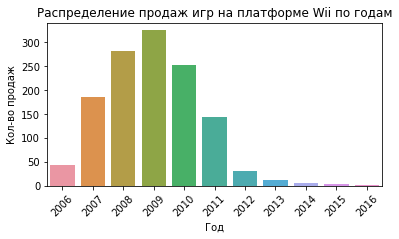

In [37]:
func_barh('Wii')
plt.show()

In [38]:
df[df['platform'] == 'DS'].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,-1.0,none,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91,8.6,E,23.21
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77,7.9,E,20.14
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,-1,-1.0,none,18.24


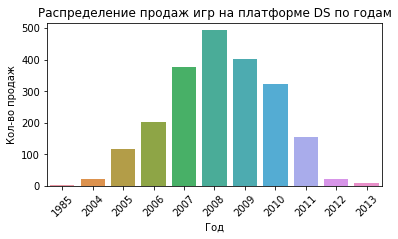

In [39]:
func_barh('DS')
plt.show()

In [40]:
df[df['platform'] == 'PS'].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
52,Gran Turismo,PS,1997,Racing,4.02,3.87,2.54,0.52,96,8.7,E,10.95
65,Final Fantasy VII,PS,1997,Role-Playing,3.01,2.47,3.28,0.96,92,9.2,T,9.72
67,Gran Turismo 2,PS,1999,Racing,3.88,3.42,1.69,0.50,93,9.0,T,9.49
88,Final Fantasy VIII,PS,1999,Role-Playing,2.28,1.72,3.63,0.23,90,8.6,T,7.86
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,3.78,2.17,1.31,0.31,-1,-1.0,none,7.57


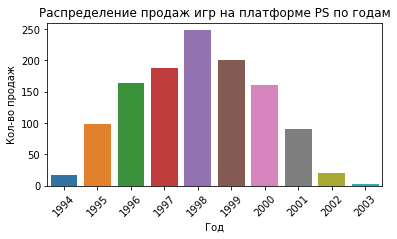

In [41]:
func_barh('PS')
plt.show()

In [42]:
array_age = []

In [43]:
def age(platform):
    year_min = df[df['platform'] == platform]['year_of_release'].min()
    year_max = df[df['platform'] == platform]['year_of_release'].max()
    array_age.append(year_max - year_min +1)

In [44]:
for i in df['platform'].unique():
    age(i)

In [45]:
sum(array_age)/len(array_age)

8.612903225806452

In [46]:
# код ревьюера
df.groupby('platform')['year_of_release'].nunique().mean()

7.67741935483871

**Вывод:** Выбраны 6 платформ с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS и построены графики распределения продаж. По распределению видно, что при выходе новой платформы на второй год в среднем пик продаж, в то время как у предыдущей платформы начинается спад продаж. Это связано с обновлением платформ - к этому времени уже достаточно пользователей купили новую платформу и разработчики игр адаптировали свои игры для их версий. Средний срок жизни платформы - 8,5 лет.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Считаю, что актуальным периодом для прогнозного анализа 2017г можеть период - 2013-2016гг

### Не учитывайте в работе данные за предыдущие годы.

Создадим новый датафрейм с данными только за период 2013-2017 гг

In [47]:
new_df_for_predict = df.query('year_of_release > 2012')

In [48]:
# код ревьюера

print(df.query('year_of_release > 2012').shape[0])
print(df.query('year_of_release > 2012 & critic_score>0 & user_score>0').shape[0])
print(df.query('year_of_release > 2012 & critic_score>0').shape[0])
print(df.query('year_of_release > 2012 & user_score>0').shape[0])


2233
976
991
1192


In [49]:
new_df_for_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   int64  
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  sum_sales        2233 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 226.8+ KB


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [50]:
new_df_for_predict_pivot = pd.pivot_table(new_df_for_predict, index = ['platform','year_of_release'], values = 'sum_sales', aggfunc = 'sum').reset_index()
new_df_for_predict_pivot = new_df_for_predict_pivot.sort_values(by='year_of_release', ascending=False)

In [51]:
new_df_for_predict_pivot['platform'].unique()

array(['XOne', 'X360', 'Wii', '3DS', 'PSV', 'PC', 'PS4', 'WiiU', 'PS3',
       'PSP', 'DS'], dtype=object)

In [52]:
new_df_for_predict_pivot.query('platform == "XOne"')

,platform,year_of_release,sum_sales
39,XOne,2016,26.15
38,XOne,2015,60.14
37,XOne,2014,54.07
36,XOne,2013,18.96


Максимальное количество продаж было в 2015 г, далее в 2016 г - резкий спад.

In [53]:
new_df_for_predict_pivot.query('platform == "X360"')

,platform,year_of_release,sum_sales
35,X360,2016,1.52
34,X360,2015,11.96
33,X360,2014,34.74
32,X360,2013,88.58


С 2013 г идет спад продаж, в 2016 г продаж практически нет

In [54]:
new_df_for_predict_pivot.query('platform == "Wii"')

,platform,year_of_release,sum_sales
27,Wii,2016,0.18
26,Wii,2015,1.14
25,Wii,2014,3.75
24,Wii,2013,8.59


По всем годам невысокий уровень продаж и постоянный спад, к 2016 г продажи практически прекратились

In [55]:
new_df_for_predict_pivot.query('platform == "3DS"')

,platform,year_of_release,sum_sales
3,3DS,2016,15.14
2,3DS,2015,27.78
1,3DS,2014,43.76
0,3DS,2013,56.57


По всем годам периода стабильный спад продаж

In [56]:
new_df_for_predict_pivot.query('platform == "PSV"')

,platform,year_of_release,sum_sales
23,PSV,2016,4.25
22,PSV,2015,6.25
21,PSV,2014,11.90
20,PSV,2013,10.59


По всем годам периода спад продаж, кроме небольшого подъема в 2014 г

In [57]:
new_df_for_predict_pivot.query('platform == "PC"')

,platform,year_of_release,sum_sales
8,PC,2016,5.25
7,PC,2015,8.52
6,PC,2014,13.28
5,PC,2013,12.38


По всем годам периода спад продаж, кроме небольшого подъема в 2014 г

In [58]:
new_df_for_predict_pivot.query('platform == "PS4"')

,platform,year_of_release,sum_sales
16,PS4,2016,69.25
15,PS4,2015,118.90
14,PS4,2014,100.00
13,PS4,2013,25.99


Пик продаж в 2015 г, затем существенный спад

In [59]:
new_df_for_predict_pivot.query('platform == "WiiU"')

,platform,year_of_release,sum_sales
31,WiiU,2016,4.60
30,WiiU,2015,16.35
29,WiiU,2014,22.03
28,WiiU,2013,21.65


По всем годам периода спад продаж, кроме небольшого подъема в 2014 г

In [60]:
new_df_for_predict_pivot.query('platform == "PS3"')

,platform,year_of_release,sum_sales
12,PS3,2016,3.60
11,PS3,2015,16.82
10,PS3,2014,47.76
9,PS3,2013,113.25


По всем годам периода стабильный спад продаж

In [61]:
new_df_for_predict_pivot.query('platform == "PSP"')

,platform,year_of_release,sum_sales
19,PSP,2015,0.12
18,PSP,2014,0.24
17,PSP,2013,3.14


По всем годам периода стабильный спад продаж

In [62]:
new_df_for_predict_pivot.query('platform == "DS"')

,platform,year_of_release,sum_sales
4,DS,2013,1.54


Вероятно, продажи не пошли

In [63]:
def sum_by_year(platform):
    data = new_df_for_predict_pivot[new_df_for_predict_pivot['platform']==platform]
    plt.plot(data['year_of_release'], data['sum_sales'], label = platform)

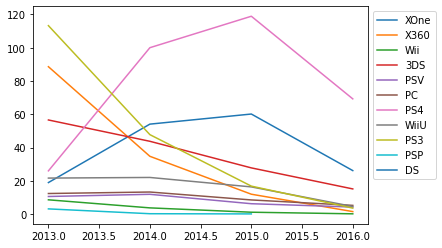

In [64]:
for i in new_df_for_predict_pivot['platform'].unique():
    sum_by_year(i)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')    
plt.show()

**Вывод:** по каждой из платформ рассмотрели данные о продажах за актуальный период. Вероятно, спады продаж связаны с выходом новых платформ. Например, пик продаж для PS3 - 2013 г и затем идет спад, а для PS4 - пик продаж в 2014-2015 гг. Самые популярные игры для платформ (по количеству продаж) PS4, PS3, XOne, X360 и 3DS.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

count     40.000000
mean      27.267250
std       32.127005
min        0.120000
25%        4.512500
50%       14.210000
75%       36.995000
max      118.900000
Name: sum_sales, dtype: float64

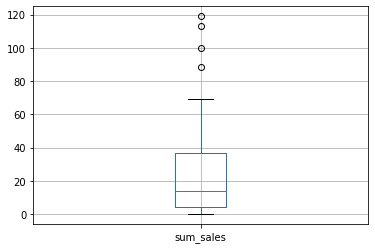

In [65]:
new_df_for_predict_pivot.boxplot(column = 'sum_sales')
new_df_for_predict_pivot['sum_sales'].describe()

count      4.000000
mean      78.535000
std       40.567917
min       25.990000
25%       58.435000
50%       84.625000
75%      104.725000
max      118.900000
Name: sum_sales, dtype: float64

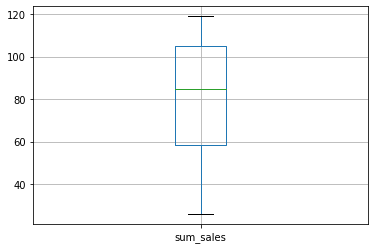

In [66]:
new_df_for_predict_pivot_ps4 = new_df_for_predict_pivot.query('platform =="PS4"')
new_df_for_predict_pivot_ps4.boxplot(column = 'sum_sales')
new_df_for_predict_pivot_ps4['sum_sales'].describe()

count      4.000000
mean      45.357500
std       48.898675
min        3.600000
25%       13.515000
50%       32.290000
75%       64.132500
max      113.250000
Name: sum_sales, dtype: float64

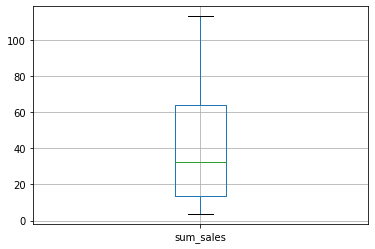

In [67]:
new_df_for_predict_pivot_ps3 = new_df_for_predict_pivot.query('platform =="PS3"')
new_df_for_predict_pivot_ps3.boxplot(column = 'sum_sales')
new_df_for_predict_pivot_ps3['sum_sales'].describe()

count     4.000000
mean     39.830000
std      20.313977
min      18.960000
25%      24.352500
50%      40.110000
75%      55.587500
max      60.140000
Name: sum_sales, dtype: float64

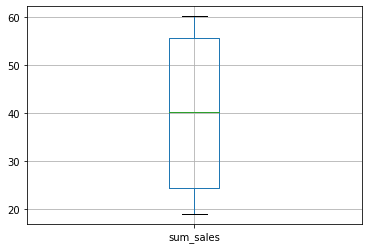

In [68]:
new_df_for_predict_pivot_xone = new_df_for_predict_pivot.query('platform =="XOne"')
new_df_for_predict_pivot_xone.boxplot(column = 'sum_sales')
new_df_for_predict_pivot_xone['sum_sales'].describe()

count     4.000000
mean     34.200000
std      38.816131
min       1.520000
25%       9.350000
50%      23.350000
75%      48.200000
max      88.580000
Name: sum_sales, dtype: float64

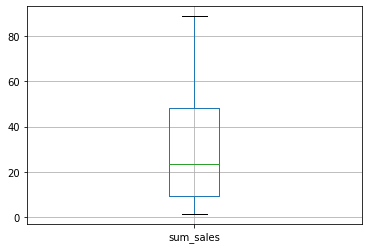

In [69]:
new_df_for_predict_pivot_x360 = new_df_for_predict_pivot.query('platform =="X360"')
new_df_for_predict_pivot_x360.boxplot(column = 'sum_sales')
new_df_for_predict_pivot_x360['sum_sales'].describe()

count     4.000000
mean     35.812500
std      18.128338
min      15.140000
25%      24.620000
50%      35.770000
75%      46.962500
max      56.570000
Name: sum_sales, dtype: float64

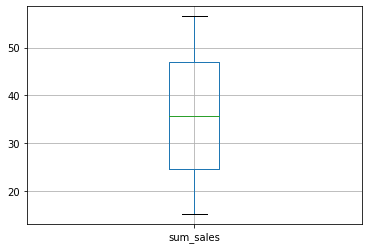

In [70]:
new_df_for_predict_pivot_3ds = new_df_for_predict_pivot.query('platform =="3DS"')
new_df_for_predict_pivot_3ds.boxplot(column = 'sum_sales')
new_df_for_predict_pivot_3ds['sum_sales'].describe()

In [71]:
# !pip install brewer2mpl
#import numpy as np
#import pandas as pd
import matplotlib as mpl
#import matplotlib.pyplot as plt
#import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.3.4
0.11.1


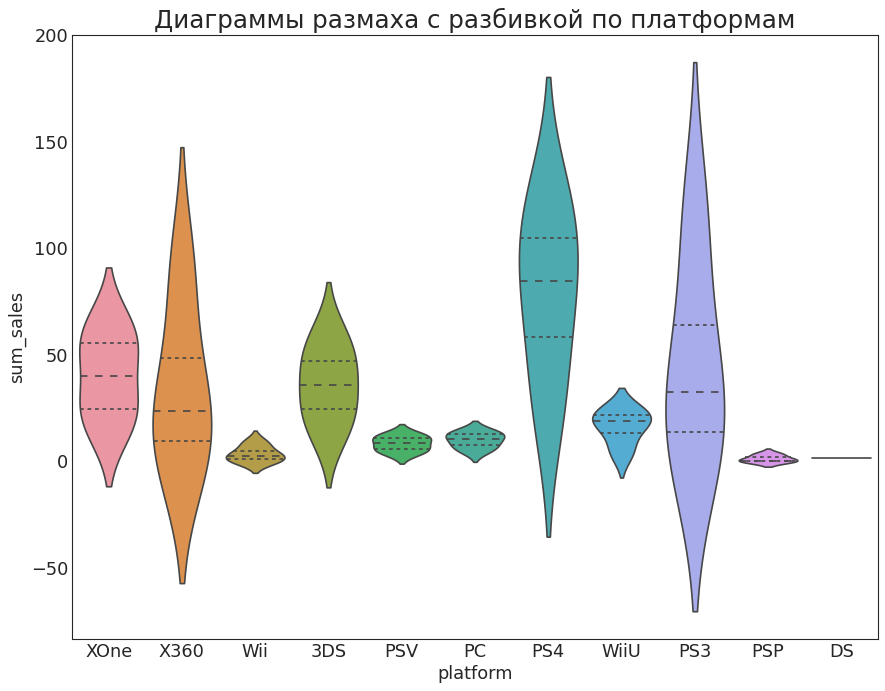

In [72]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='platform', y='sum_sales', data =new_df_for_predict_pivot, scale='width', inner='quartile')

# Decoration
plt.title('Диаграммы размаха с разбивкой по платформам', fontsize=22)
plt.show()  

In [73]:
def graph_box(xaxes, yaxes, xlab, ylab, xlim, title):
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(x = xaxes, y = yaxes)
    ax.set(xlabel = xlab, ylabel = ylab, xlim = xlim, title = title)
    plt.show()

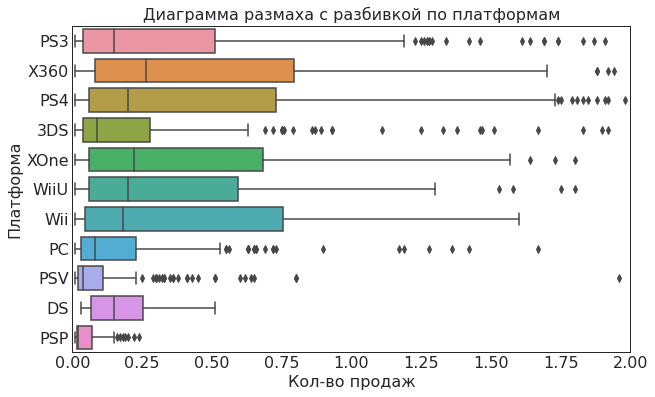

In [74]:
xlim = [0, 2]
graph_box(new_df_for_predict['sum_sales'], new_df_for_predict['platform'], 'Кол-во продаж',
          'Платформа', xlim, 'Диаграмма размаха с разбивкой по платформам')

**Вывод:** На графиках "с усами" видны отличия в суммарных продажах (количество копий). 
Игры для платформ PS3, PS4, 3DS самые популярные.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Рассмотрим, как влияют отзывы пользователей и критиков для платформы PS4

In [75]:
reviews = new_df_for_predict.query('platform =="PS4" & critic_score>0').loc[:,['sum_sales', 'critic_score']]
reviews.head(10)

,sum_sales,critic_score
42,12.62,97
77,8.58,82
92,7.66,83
94,7.60,85
105,7.17,87
143,6.08,82
154,5.64,76
171,5.39,93
231,4.62,86
245,4.47,77


In [76]:
reviews.corr()

,sum_sales,critic_score
sum_sales,1.000000,0.406568
critic_score,0.406568,1.000000


Корреляция продаж с рейтингом критиков


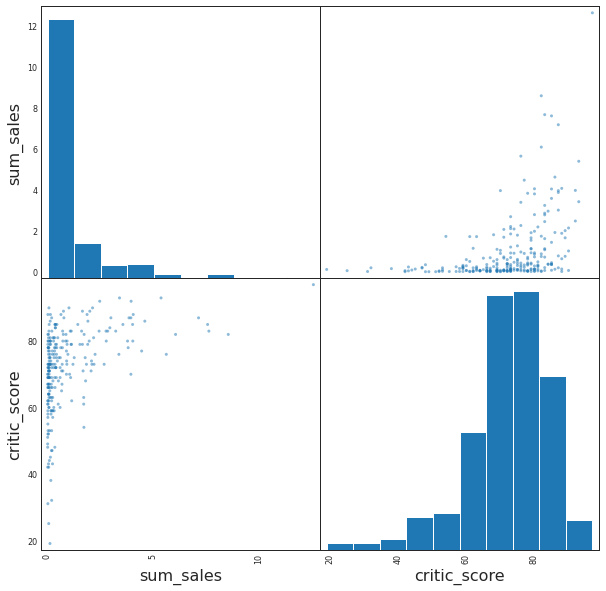

In [77]:
print('Корреляция продаж с рейтингом критиков')
pd.plotting.scatter_matrix(reviews, figsize=(10, 10))
plt.show() 

In [78]:
reviews_users = new_df_for_predict.query('platform =="PS4" & user_score>0').loc[:,['sum_sales', 'user_score']]
reviews.head(10)

,sum_sales,critic_score
42,12.62,97
77,8.58,82
92,7.66,83
94,7.60,85
105,7.17,87
143,6.08,82
154,5.64,76
171,5.39,93
231,4.62,86
245,4.47,77


In [79]:
reviews.corr()

,sum_sales,critic_score
sum_sales,1.000000,0.406568
critic_score,0.406568,1.000000


Корреляция продаж с рейтингом пользователей


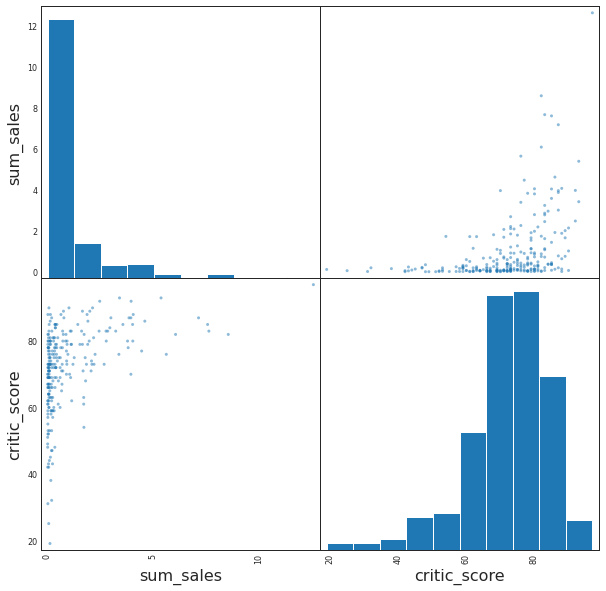

In [80]:
print('Корреляция продаж с рейтингом пользователей')
pd.plotting.scatter_matrix(reviews, figsize=(10, 10))
plt.show() 

**Вывод:** для PS4 рассмотрели как влияют на продажи отзывы пользователей и критиков. Есть корреляция между продажами и рейтингом критиков.

### Соотнесите выводы с продажами игр на других платформах.

Проверим для PS3, XOne, X360 и 3DS.

In [81]:
def func_scatter_critic(platform):
    temp = new_df_for_predict.query('platform ==platform & critic_score>0').loc[:,['sum_sales', 'critic_score']]
    print(temp.corr())
    pd.plotting.scatter_matrix(temp, figsize=(10, 10))

In [82]:
def func_scatter_user(platform):
    temp = new_df_for_predict.query('platform ==platform & user_score>0').loc[:,['sum_sales', 'user_score']]
    print(temp.corr())
    pd.plotting.scatter_matrix(temp, figsize=(10, 10))

Корреляция продаж и рейтинга критиков для платформы PS3
              sum_sales  critic_score
sum_sales        1.0000        0.3137
critic_score     0.3137        1.0000


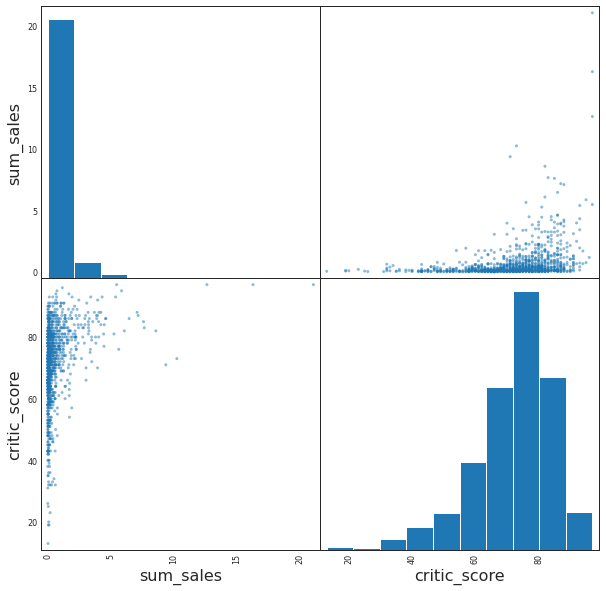

In [83]:
print('Корреляция продаж и рейтинга критиков для платформы PS3')
func_scatter_critic("PS3")
plt.show()

Корреляция продаж и рейтинга пользователей для платформы PS3
            sum_sales  user_score
sum_sales    1.000000   -0.002608
user_score  -0.002608    1.000000


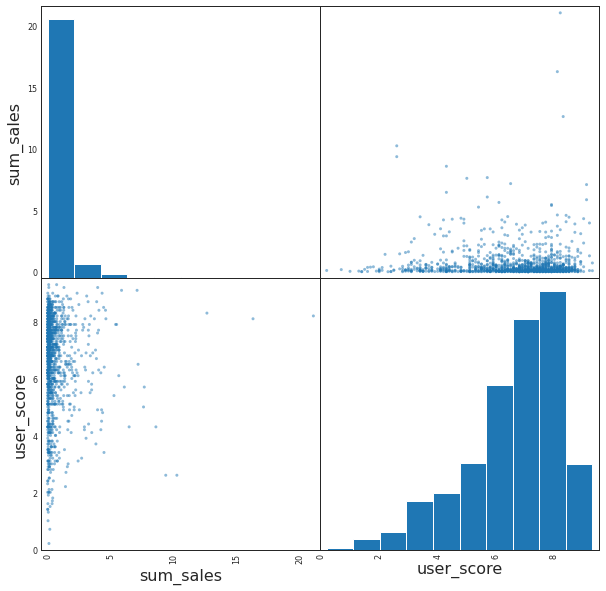

In [84]:
print('Корреляция продаж и рейтинга пользователей для платформы PS3')
func_scatter_user("PS3")
plt.show()

Корреляция продаж для платформы XOne
              sum_sales  critic_score
sum_sales        1.0000        0.3137
critic_score     0.3137        1.0000


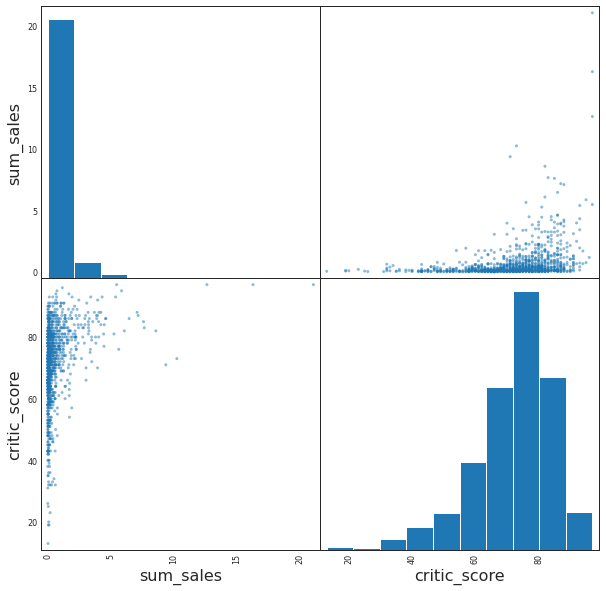

In [85]:
print('Корреляция продаж и рейтинга критиков для платформы XOne')
func_scatter_critic("XOne")
plt.show()

Корреляция продаж и рейтинга пользователей для платформы XOne
            sum_sales  user_score
sum_sales    1.000000   -0.002608
user_score  -0.002608    1.000000


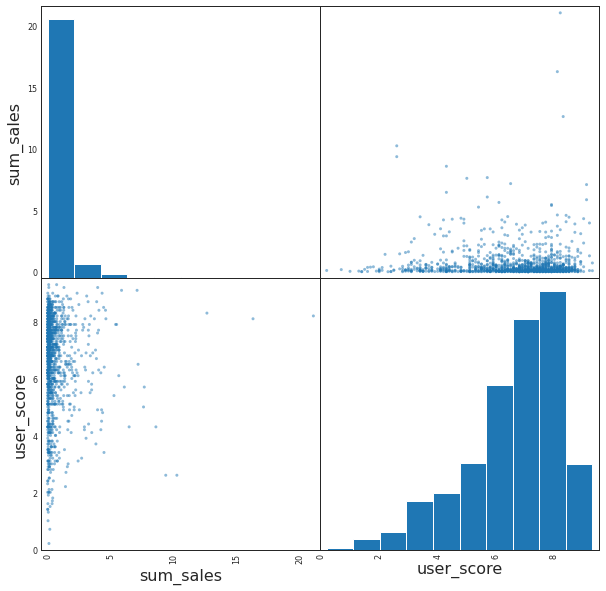

In [86]:
print('Корреляция продаж и рейтинга пользователей для платформы XOne')
func_scatter_user("XOne")
plt.show()

Корреляция продаж для платформы X360
              sum_sales  critic_score
sum_sales        1.0000        0.3137
critic_score     0.3137        1.0000


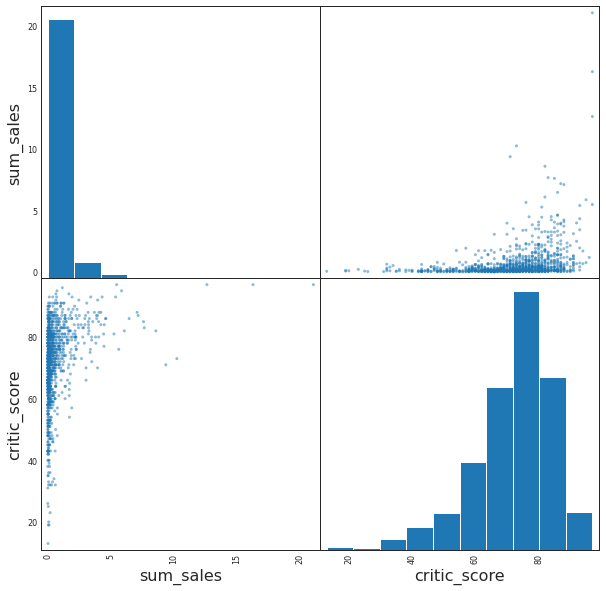

In [87]:
print('Корреляция продаж и рейтинга критиков для платформы X360')
func_scatter_critic("X360")
plt.show()

Корреляция продаж и рейтинга пользователей для платформы X360
            sum_sales  user_score
sum_sales    1.000000   -0.002608
user_score  -0.002608    1.000000


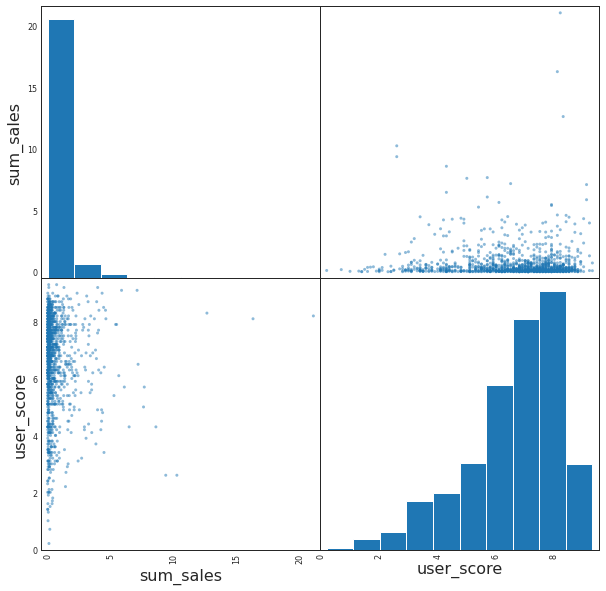

In [88]:
print('Корреляция продаж и рейтинга пользователей для платформы X360')
func_scatter_user("X360")
plt.show()

Корреляция продаж и рейтинга критиков для платформы 3DS
              sum_sales  critic_score
sum_sales        1.0000        0.3137
critic_score     0.3137        1.0000


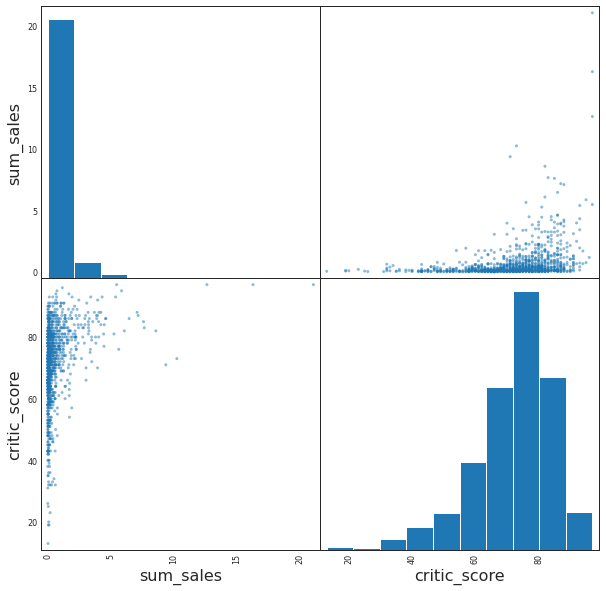

In [89]:
print('Корреляция продаж и рейтинга критиков для платформы 3DS')
func_scatter_critic("3DS")
plt.show()

Корреляция продаж и рейтинга пользователей для платформы 3DS
            sum_sales  user_score
sum_sales    1.000000   -0.002608
user_score  -0.002608    1.000000


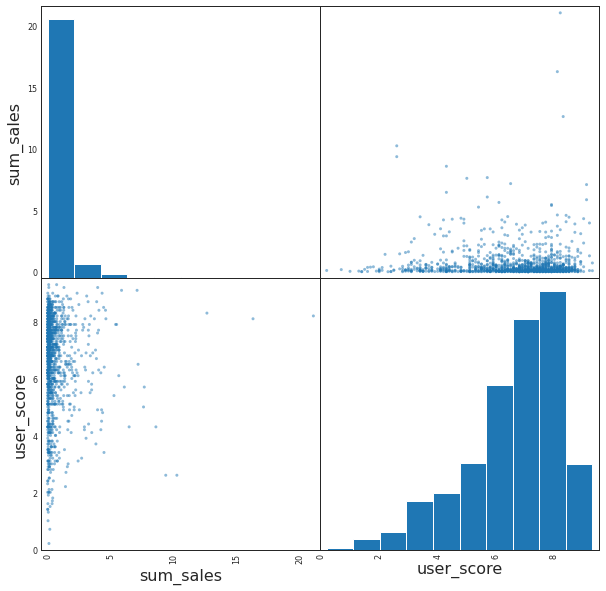

In [90]:
print('Корреляция продаж и рейтинга пользователей для платформы 3DS')
func_scatter_user("3DS")
plt.show()

**Вывод:** распределение и корреляция по другим платформам похожи, выделяется только 3DS - есть корреляция от пользовательского рейтинга.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [91]:
new_df_genre_pivot = pd.pivot_table(new_df_for_predict, index='genre', values='sum_sales', aggfunc='sum')
new_df_genre_pivot.sort_values('sum_sales', ascending=False)

,sum_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


In [92]:
def med_mean(genre):
    print(f"Жанр: {genre}")
    print(new_df_for_predict[new_df_for_predict['genre']==genre]['sum_sales'].describe())

In [93]:
for genre in new_df_for_predict['genre'].unique():
    med_mean(genre)

Жанр: Action
count    766.000000
mean       0.420196
std        1.253909
min        0.010000
25%        0.030000
50%        0.110000
75%        0.337500
max       21.050000
Name: sum_sales, dtype: float64
Жанр: Shooter
count    187.000000
mean       1.245882
std        2.014107
min        0.010000
25%        0.140000
50%        0.450000
75%        1.425000
max       14.630000
Name: sum_sales, dtype: float64
Жанр: Role-Playing
count    292.000000
mean       0.499623
std        1.353164
min        0.010000
25%        0.060000
50%        0.125000
75%        0.382500
max       14.600000
Name: sum_sales, dtype: float64
Жанр: Misc
count    155.000000
mean       0.405290
std        1.007985
min        0.010000
25%        0.030000
50%        0.100000
75%        0.330000
max        9.180000
Name: sum_sales, dtype: float64
Жанр: Sports
count    214.000000
mean       0.703972
std        1.219237
min        0.010000
25%        0.070000
50%        0.240000
75%        0.765000
max        8.580000
Na

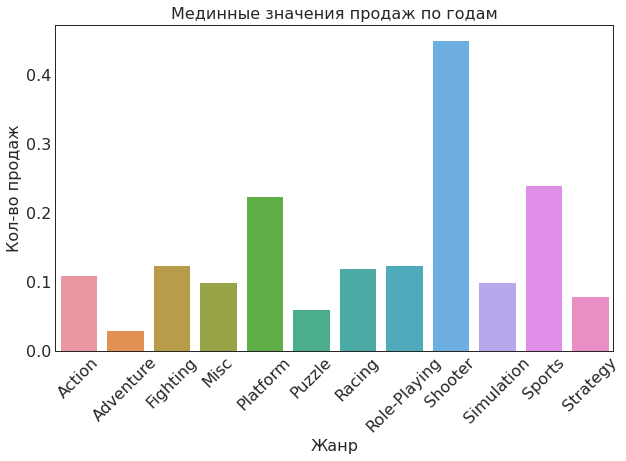

In [94]:
data = pd.pivot_table(new_df_for_predict, index='genre', values='sum_sales', aggfunc='median').reset_index()
plt.figure(figsize=(10,6))
ax = sns.barplot(x = 'genre', y = 'sum_sales', data = data)
ax.set(xlabel = 'Жанр', ylabel = 'Кол-во продаж', title = 'Мединные значения продаж по годам')
plt.xticks(rotation = 45)
plt.show()

**Вывод:** Самые популярные жанры на основе сумм продаж - Action, Shooter, Sports, Role-Playing. Наименнее популярные - Strategy, Puzzle. По медианным значениям самые популярные - Shooter, Sports, Misc.

## Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [95]:
def ersb(data):
    genre_list = data['genre'].unique()
    genre_dict = {}
    for genre in genre_list:
        print('Жанр', genre)
        rating_value_counts = new_df_for_predict[new_df_for_predict['genre'] == genre]['rating'].value_counts()
        print(rating_value_counts)
        genre_dict[genre] = rating_value_counts.index[0]

In [96]:
new_df_na = new_df_for_predict.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').reset_index()
new_df_na = new_df_na.sort_values(by='na_sales', ascending=False)
new_df_na = new_df_na.iloc[0:5,]
new_df_na

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


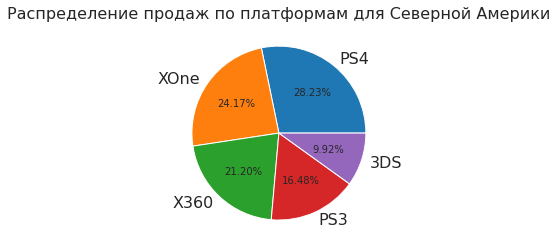

In [97]:
labels = new_df_na['platform']
plt.pie(new_df_na['na_sales'], labels=labels, autopct='%1.2f%%')
plt.title('Распределение продаж по платформам для Северной Америки')
plt.show()

In [98]:
new_df_na = new_df_for_predict.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').reset_index()
new_df_na = new_df_na.sort_values(by='na_sales', ascending=False)
new_df_na = new_df_na.iloc[0:5,]
new_df_na

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


In [99]:
ersb(new_df_na)

Жанр Action
none    347
M       160
T       107
E10+    101
E        51
Name: rating, dtype: int64
Жанр Shooter
M       119
T        26
none     26
E10+     16
Name: rating, dtype: int64
Жанр Sports
E       129
none     46
T        24
E10+     15
Name: rating, dtype: int64
Жанр Role-Playing
none    154
T        73
M        53
E10+     10
E         2
Name: rating, dtype: int64
Жанр Misc
none    91
E10+    29
T       17
E       14
M        4
Name: rating, dtype: int64


**Вывод:** топ-5 платформ для Северной Америки: X360, PS2, Wii, PS3, DS, а самые популярные жанры: Action, Sports, Shooter, Platform, Misc.

In [100]:
new_df_eu = new_df_for_predict.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').reset_index()
new_df_eu = new_df_eu.sort_values(by='eu_sales', ascending=False)
new_df_eu = new_df_eu.iloc[0:5,]
new_df_eu

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


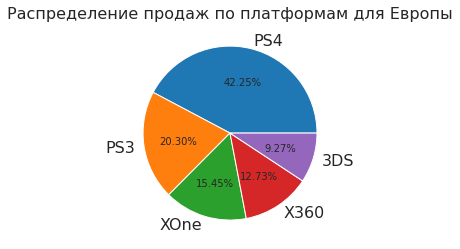

In [101]:
labels = new_df_eu['platform']
plt.pie(new_df_eu['eu_sales'], labels=labels, autopct='%1.2f%%')
plt.title('Распределение продаж по платформам для Европы')
plt.show()

In [102]:
new_df_eu = new_df_for_predict.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').reset_index()
new_df_eu = new_df_eu.sort_values(by='eu_sales', ascending=False)
new_df_eu = new_df_eu.iloc[0:5,]
new_df_eu

,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


In [103]:
ersb(new_df_eu)

Жанр Action
none    347
M       160
T       107
E10+    101
E        51
Name: rating, dtype: int64
Жанр Shooter
M       119
T        26
none     26
E10+     16
Name: rating, dtype: int64
Жанр Sports
E       129
none     46
T        24
E10+     15
Name: rating, dtype: int64
Жанр Role-Playing
none    154
T        73
M        53
E10+     10
E         2
Name: rating, dtype: int64
Жанр Racing
E       50
none    18
E10+    11
T        4
M        2
Name: rating, dtype: int64


**Вывод:** топ-5 платформ для Европы: PS2, PS3, X360, Wii, PS, а самые популярные жанры - Action, Sports, Shooter, Racing, Misc.

In [104]:
new_df_jp = new_df_for_predict.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').reset_index()
new_df_jp = new_df_jp.sort_values(by='jp_sales', ascending=False)
new_df_jp = new_df_jp.iloc[0:5,]
new_df_jp

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


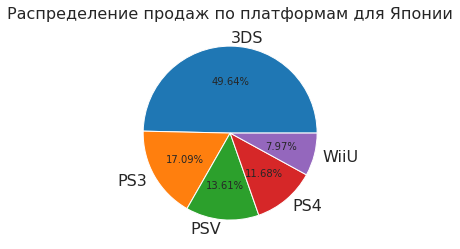

In [105]:
labels = new_df_jp['platform']
plt.pie(new_df_jp['jp_sales'], labels=labels, autopct='%1.2f%%')
plt.title('Распределение продаж по платформам для Японии')
plt.show()

In [106]:
new_df_jp = new_df_for_predict.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').reset_index()
new_df_jp = new_df_jp.sort_values(by='jp_sales', ascending=False)
new_df_jp = new_df_jp.iloc[0:5,]
new_df_jp

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


In [107]:
ersb(new_df_jp)

Жанр Role-Playing
none    154
T        73
M        53
E10+     10
E         2
Name: rating, dtype: int64
Жанр Action
none    347
M       160
T       107
E10+    101
E        51
Name: rating, dtype: int64
Жанр Misc
none    91
E10+    29
T       17
E       14
M        4
Name: rating, dtype: int64
Жанр Fighting
T       41
none    32
M        4
E10+     3
Name: rating, dtype: int64
Жанр Shooter
M       119
T        26
none     26
E10+     16
Name: rating, dtype: int64


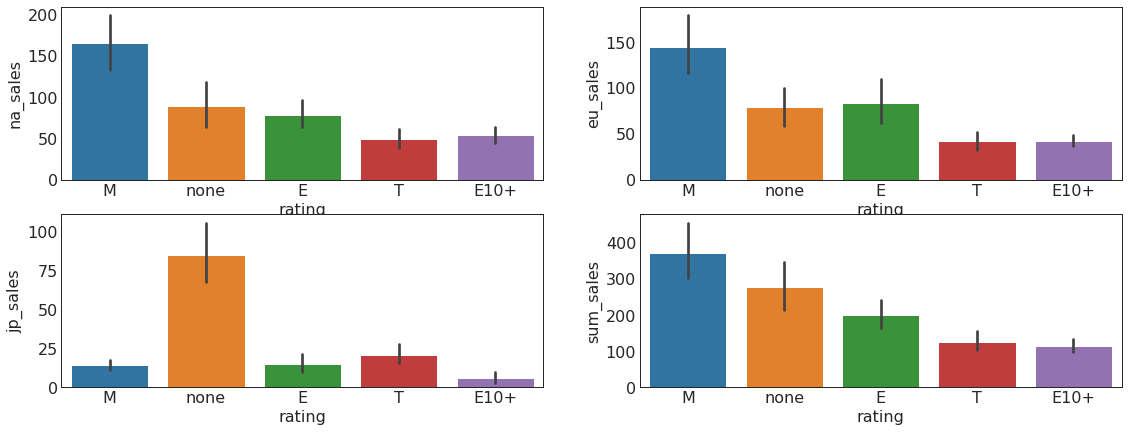

In [108]:
fig, axis = plt.subplots(2,2, figsize=(19,7))
sns.barplot(y='na_sales', x='rating', data = new_df_for_predict,estimator=sum, ax=axis[0,0]);
sns.barplot(y='eu_sales', x='rating', data = new_df_for_predict,estimator=sum, ax=axis[0,1]);
sns.barplot(y='jp_sales', x='rating', data = new_df_for_predict,estimator=sum, ax=axis[1,0]);
sns.barplot(y='sum_sales', x='rating', data = new_df_for_predict,estimator=sum, ax=axis[1,1]);

plt.show()

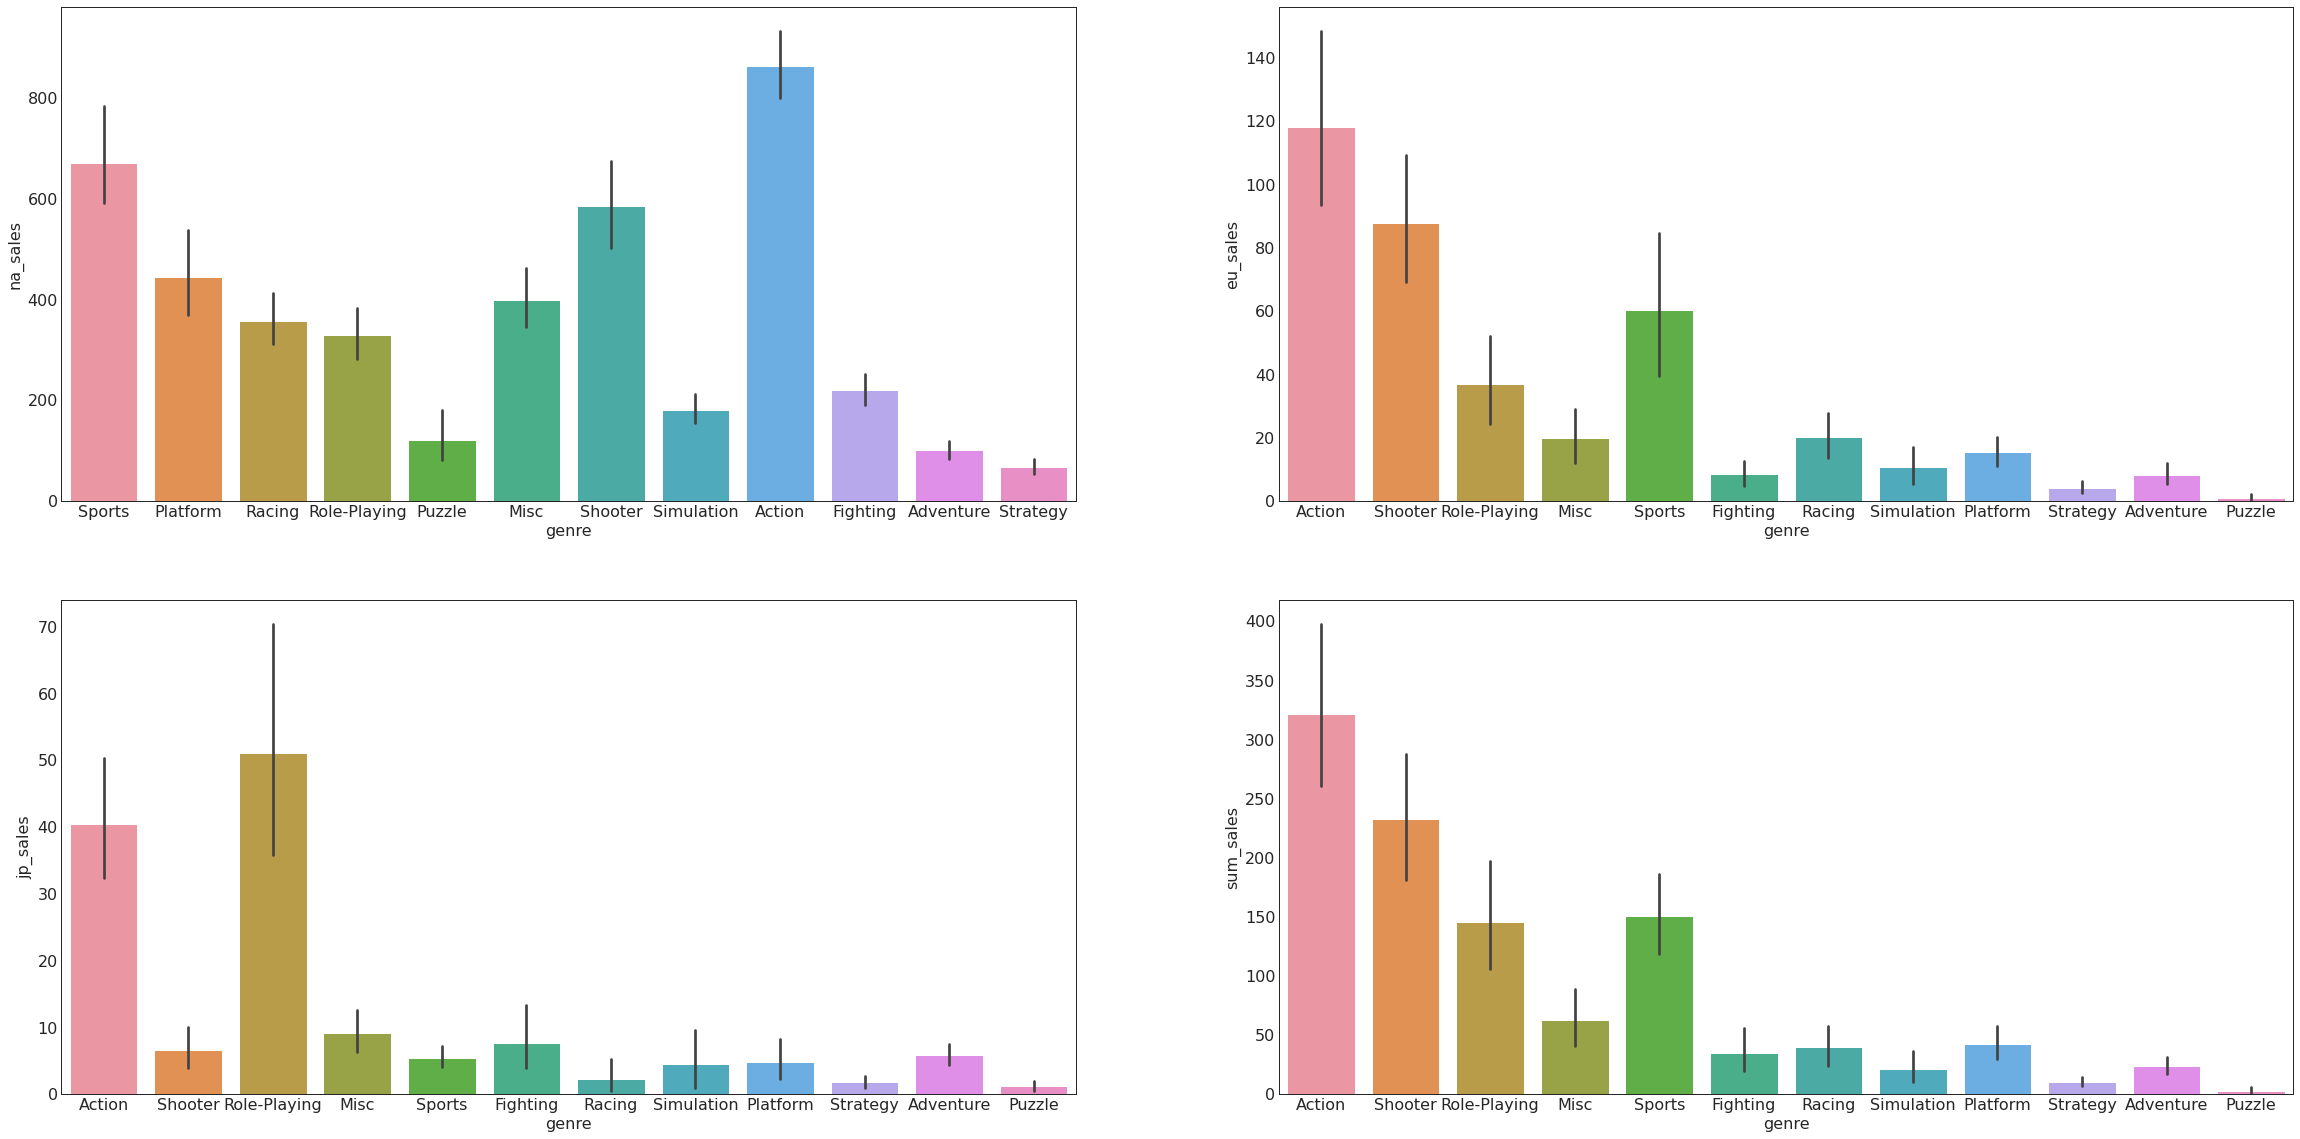

In [109]:
fig, axis = plt.subplots(2,2, figsize=(40,20))
a = sns.barplot(y='na_sales', x='genre', data = df,estimator=sum, ax=axis[0,0])
sns.barplot(y='eu_sales', x='genre', data = new_df_for_predict,estimator=sum, ax=axis[0,1])
sns.barplot(y='jp_sales', x='genre', data = new_df_for_predict,estimator=sum, ax=axis[1,0])
sns.barplot(y='sum_sales', x='genre', data = new_df_for_predict,estimator=sum, ax=axis[1,1])

plt.show()

**Вывод:** топ-5 платформ для Европы: DS, PS, PS2, SNES, 3DS, а самые популярные жанры - Role-Playing, Action, Sports, Platform, Misc.

## Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

* Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются

In [110]:
df_hypothesis1_xbox = new_df_for_predict.query('platform=="XOne" & user_score>0').loc[:,['platform', 'user_score']]
df_hypothesis1_xbox.head(5)

,platform,user_score
165,XOne,7.9
179,XOne,5.4
242,XOne,6.4
270,XOne,6.2
373,XOne,4.1


In [111]:
df_hypothesis1_xbox['user_score'].mean()

6.521428571428572

In [112]:
df_hypothesis1_pc = new_df_for_predict.query('platform=="PC" & user_score>0').loc[:,['platform', 'user_score']]
df_hypothesis1_pc.head(5)

,platform,user_score
458,PC,3.9
1095,PC,7.9
1351,PC,2.2
1437,PC,6.0
1530,PC,5.4


In [113]:
df_hypothesis1_pc['user_score'].mean()

6.2696774193548395

In [114]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(df_hypothesis1_xbox['user_score'], df_hypothesis1_pc['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.14012658403611647
Не отвергаем нулевую гипотезу


С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

**Нулевая гипотеза:** средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые


**Альтернативная гипотеза:** средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [115]:
df_hypothesis2_action = new_df_for_predict.query('genre=="Action" & user_score>0').loc[:,['genre', 'user_score']]
df_hypothesis2_action.head(5)

,genre,user_score
16,Action,8.2
23,Action,8.1
42,Action,8.3
149,Action,9.1
165,Action,7.9


In [116]:
df_hypothesis2_action['user_score'].mean()

6.837532133676092

In [117]:
df_hypothesis2_sports = new_df_for_predict.query('genre=="Sports" & user_score>0').loc[:,['genre', 'user_score']]
df_hypothesis2_sports.head(5)

,genre,user_score
77,Sports,4.3
94,Sports,5.0
126,Sports,4.3
143,Sports,5.7
264,Sports,4.5


In [118]:
df_hypothesis2_sports['user_score'].mean()

5.238124999999999

In [119]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(df_hypothesis2_action['user_score'], df_hypothesis2_sports['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Действительно, рейтинги не равны (Action - 6.84, Sports - 5.24)

## Общий вывод

* В ходе статистического анализа данных по продажам компьютерных игр были проанализированы предоставленные данные. 
Была выполнена предобработка данных: удалены дубли и пропуски, добавлен новый столбец для анализа - общая сумма продаж, исправлены типы данных.

* Мы анализировали данные по разным платформам за актуальный период 2013-2016 гг. 

**Самые популярные платформы**
* EU: PS4, XOne, PC, 3DS, WiiU - Европа
* JP: 3DS, PS4, PSV, PS3, WiiU - Япония
* NA: PS4, XOne, 3DS, WiiU, PC - CША

**Самые популярные жанры**
* EU: Shooter, Sports, Action, Role-Playing, Racing - Европа
* JP: Action, Role-Playing, Adventure, Shooter, Misc - Япония
* NA: Shooter, Action, Sports, Role-Playing, Fighting - CША

В ходе исследования были проверены две гипотезы, которые позволили сделать следующие выводы:
* 1. С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.
* 2. Cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны.


**Рекомендации для отдела маркетинга для проведения рекламной компании в 2017 год:** в прогнозируемом периоде рекомендую продавать игры для самых популярных платформ самых популярных жанров. Предлагать ассортимент игр для вновь вышедших платформ и оставить ассортимент для PS4, XOne и 3DS (вероятно, что продажи игр на этих платформах также будут высоки).